In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a reference the CSV file desired
enrollment_csv = "Enrollment -- 12-Month Enrollment Rates 2001-17/Comprehensive 12-Month Enrollment Rates 2001-17.csv"

# Read the CSV into a Pandas DataFrame
enrollment_df = pd.read_csv(enrollment_csv)

# Print the first five rows of data to the screen
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total,IDX_EF
0,100654,Alabama A & M University,2001.0,Undergraduate,4693.0,-2.0
1,100663,University of Alabama at Birmingham,2001.0,Undergraduate,12910.0,-2.0
2,100706,University of Alabama in Huntsville,2001.0,Undergraduate,6529.0,-2.0
3,100724,Alabama State University,2001.0,Undergraduate,5228.0,-2.0
4,100751,The University of Alabama,2001.0,Undergraduate,16983.0,-2.0


In [3]:
# How many institutions are we starting with?
totalInstitutions = len(enrollment_df)
print(totalInstitutions)

90267


In [4]:
# Delete columns that we're not interested in (The variable IDX_EF contains the UNITID of the parent institution.)
enrollment_df = enrollment_df.drop(["IDX_EF"], axis=1)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001.0,Undergraduate,4693.0
1,100663,University of Alabama at Birmingham,2001.0,Undergraduate,12910.0
2,100706,University of Alabama in Huntsville,2001.0,Undergraduate,6529.0
3,100724,Alabama State University,2001.0,Undergraduate,5228.0
4,100751,The University of Alabama,2001.0,Undergraduate,16983.0


In [5]:
# Remove the rows with missing data
enrollment_df = enrollment_df.dropna(how="any")
institutionsMinusBlanks = len(enrollment_df)
print(institutionsMinusBlanks)

90250


In [6]:
# How many institutions had data that wasn't incuded?
instutionsWithoutData = (totalInstitutions - institutionsMinusBlanks)
print(instutionsWithoutData)

17


In [7]:
#As type to change the years type to get rid of those pesky .0 and replace the current year column with this new clean one
enrollment_df["year"]=enrollment_df["year"].astype(int)
enrollment_df.head()

,unitid,institution name,year,EF2001D1.Type of student counted,EF2001D1.Grand total
0,100654,Alabama A & M University,2001,Undergraduate,4693.0
1,100663,University of Alabama at Birmingham,2001,Undergraduate,12910.0
2,100706,University of Alabama in Huntsville,2001,Undergraduate,6529.0
3,100724,Alabama State University,2001,Undergraduate,5228.0
4,100751,The University of Alabama,2001,Undergraduate,16983.0


In [8]:
# Count how many Institution entries do we have per year
InstitutionYearCounts = enrollment_df["year"].value_counts()
InstitutionYearCounts = InstitutionYearCounts.sort_values(axis=0, ascending=True)
print(InstitutionYearCounts)

2001    4253
2002    4522
2003    4604
2004    4682
2005    4762
2006    4841
2007    4910
2008    5025
2009    5176
2010    5409
2011    5607
2012    5751
2013    5891
2014    6038
2015    6174
2016    6275
2017    6330
Name: year, dtype: int64


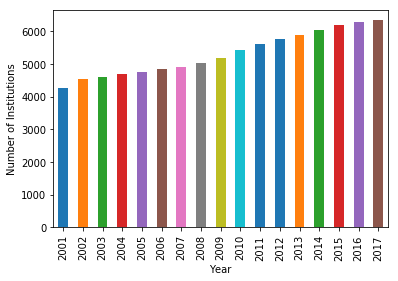

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a bar chart based off of the group series from before
institutionCountBar = InstitutionYearCounts.plot(kind='bar')

# Set the xlabel and ylabel using class methods
institutionCountBar.set_xlabel("Year")
institutionCountBar.set_ylabel("Number of Institutions")


plt.show()
plt.tight_layout()

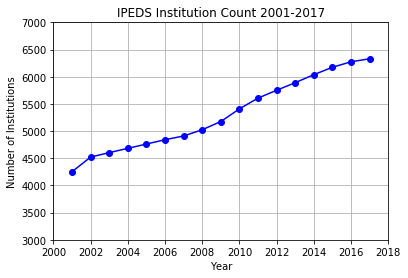

In [10]:
institutionCountLine = InstitutionYearCounts.plot.line(style='.-', x='index', marker ='o', color='blue')
institutionCountLine.set_ylim(ymin=3000, ymax=7000)
institutionCountLine.set_xlim(xmin=2000, xmax=2018)
plt.title("IPEDS Institution Count 2001-2017")
plt.xlabel("Year")
plt.ylabel("Number of Institutions")
plt.grid()

In [11]:
#Total enrollment numbers between 2001 and 2017 = sum EF2001D1.Grand total per year
pd.to_numeric(enrollment_df['EF2001D1.Grand total'])
enrollment_df.dtypes
totalEnrollment = enrollment_df["EF2001D1.Grand total"].sum()
totalEnrollment

365252506.0

In [12]:
#Loop through years and add EF2001D1.Grand total if years match?


enrollmentByYear = enrollment_df.groupby("year")
enrollmentByYear = enrollmentByYear.agg(sum)
enrollmentByYear

,EF2001D1.Grand total
year,
2001,17965501.0
2002,18774604.0
2003,19385482.0
2004,19493543.0
2005,19792638.0
2006,19957444.0
2007,20240347.0
2008,20714313.0
2009,21913240.0


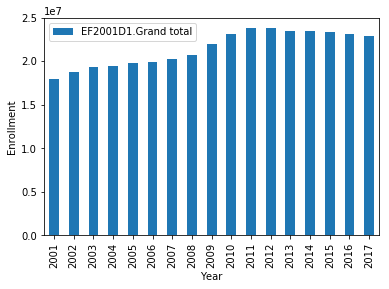

<Figure size 432x288 with 0 Axes>

In [13]:
# Create a bar chart based off of the group series from before
enrollmentByYearBar = enrollmentByYear.plot(kind='bar')

# Set the xlabel and ylabel using class methods
enrollmentByYearBar.set_xlabel("Year")
enrollmentByYearBar.set_ylabel("Enrollment")


plt.show()
plt.tight_layout()

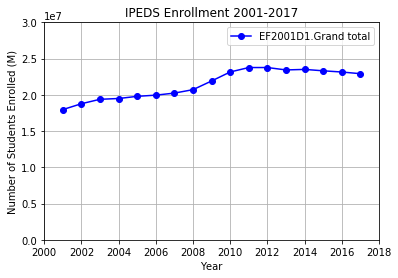

In [17]:
enrollmentByYearLine = enrollmentByYear.plot.line(style='.-', marker ='o', color='blue')
enrollmentByYearLine.set_ylim(ymin=0, ymax=30000000)
enrollmentByYearLine.set_xlim(xmin=2000, xmax=2018)
plt.title("IPEDS Enrollment 2001-2017")
plt.xlabel("Year")
plt.ylabel("Number of Students Enrolled (M)")
plt.grid()

In [15]:
# DATA FAULT??: more and more institutions are reporting their enrollment data... are these new institutions, or are they simply
# just now starting to report their data?
# If we simply total enrollments per year from this dataset, it could look like enrollment rates are increasing, 
# when in reality we're just getting more data from new sources. 
# How do we more accurately show the data? Average? Enrollments/Institution? 